# 1. 第一次作业

    修改如下代码，计算603的32次方根，可以构造自己的算法。注意提交作业的文件名格式：1_求根_姓名.ipynb。若用其它语言，请你用 word 的文件，将文字、代码、结果都加上。

## 1.1 开32次方根

### 1.1.1 算法一：二分法搜索的推广

In [21]:
from random import randint
y = 603 #选择开根常数
epsilon = 0.0000001 #选取精度
numGuesses = 0 #计数器
low = 0.0 # 设定下限
high = y # 设定上限
ans = randint(low,high) #选随机数作为初始猜测值

nn = 32 #开根次数
#若N次方后小于y，则将下限改为ans,若大于y，则上限改为ans
while abs(ans**nn - y) >= epsilon:
    print('low = %f, high = %f, ans = %f'%(low, high, ans))
    numGuesses += 1
    if ans**nn < y:
        low = ans
    else:
        high = ans
    ans = (high + low)/2.0
print('numGuesses = ' + str(numGuesses))
print('%s is close to %d root of x'%(ans,nn))

low = 0.000000, high = 603.000000, ans = 443.000000
low = 0.000000, high = 443.000000, ans = 221.500000
low = 0.000000, high = 221.500000, ans = 110.750000
low = 0.000000, high = 110.750000, ans = 55.375000
low = 0.000000, high = 55.375000, ans = 27.687500
low = 0.000000, high = 27.687500, ans = 13.843750
low = 0.000000, high = 13.843750, ans = 6.921875
low = 0.000000, high = 6.921875, ans = 3.460938
low = 0.000000, high = 3.460938, ans = 1.730469
low = 0.000000, high = 1.730469, ans = 0.865234
low = 0.865234, high = 1.730469, ans = 1.297852
low = 0.865234, high = 1.297852, ans = 1.081543
low = 1.081543, high = 1.297852, ans = 1.189697
low = 1.189697, high = 1.297852, ans = 1.243774
low = 1.189697, high = 1.243774, ans = 1.216736
low = 1.216736, high = 1.243774, ans = 1.230255
low = 1.216736, high = 1.230255, ans = 1.223495
low = 1.216736, high = 1.223495, ans = 1.220116
low = 1.220116, high = 1.223495, ans = 1.221806
low = 1.220116, high = 1.221806, ans = 1.220961
low = 1.220961, high

## 1.2 优化问题

   为了将开方问题转化为优化问题，寻找合适的 $x$ 使 $x\times x=y $，转变成寻找合适的 $x$,使 *cost function* 最小。然后利用梯度下降法，寻找 $x$。

cost function 定义如下：$$f(x)=\frac{1}{2}(x^{n}-y)^2$$

梯度下降更新规则如下：$$x = x - \alpha\frac{d f(x)}{d x} $$

### 1.2.1 cost function

    学习率  𝛼  和迭代次数之间，学习率大则下降速度越快，迭代次数相对较少，但当学习率过大时，则会产生振荡现象，反而导致迭代次数增多，甚至无法得出结果
    cost function 的形状也会影响取值的判定，如果是3次方，则不存在最小值，判定也难以直接通过f(x)给出

In [26]:
def costfunction(x,n,y): # 定义 cost function
    return (x**n-y)**2/2 
def dcost(x,n,y):        # 定义 cost function 的导数
    return (x**n-y)*n*x**(n-1)
x = 1.2      #给定初值
y = 603.    #选择开根常数
n = 32     #开根次数

X = []
Y = []

step = 0.000000001 # 学习率
for i in range(1,50):
    x-= step*dcost(x,n,y)
    #print(i,costfunction(x,n,y),x)
    X.append(i)
    Y.append(costfunction(x,n,y))

1.2214758761428195 602.9990304057147 603.0


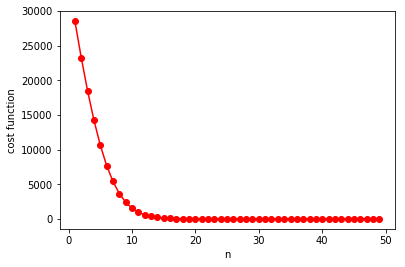

In [25]:
from pylab import plot, xlabel, ylabel
%matplotlib inline     
#上行具体作用：当调用matplotlib.pyplot的绘图函数plot()进行绘图的时候，或者生成一个figure画布的时候，可以直接在python console里面生成图像。
plot(X,Y,'r-o')
xlabel("n")
ylabel("cost function")

print(x,x**n,y)

算法越复杂，cost function越复杂，我们可以通过cost function的形状来看出，为什么会出现振荡最后稳定值是错误的原因。

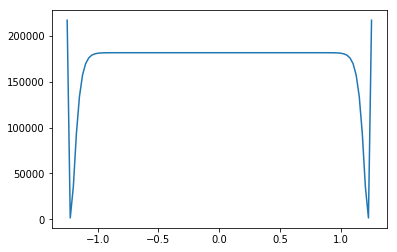

In [7]:
import numpy as np
from pylab import plot
%matplotlib inline     
#上行具体作用：当调用matplotlib.pyplot的绘图函数plot()进行绘图的时候，或者生成一个figure画布的时候，可以直接在python console里面生成图像。
n = 32
a = 603
x = np.linspace(-1.25, 1.25, 100)
y = (x**n-a)**2/2
plot(x,y)

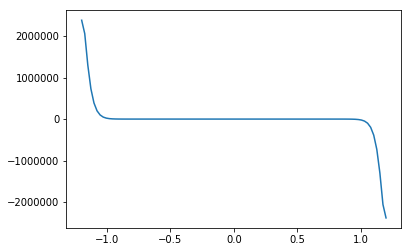

In [11]:
import numpy as np
from pylab import plot
%matplotlib inline     
#上行具体作用：当调用matplotlib.pyplot的绘图函数plot()进行绘图的时候，或者生成一个figure画布的时候，可以直接在python console里面生成图像。
n = 32
a = 603
x = np.linspace(-1.2, 1.2, 100)
y = (x**n-a)*n*x**(n-1)
plot(x,y)

### 1.2.2 牛顿迭代法求根


将开放为题转化为求函数 $$f(x) = x^n - y$$ 的零点的问题。

可用牛顿迭代法：$$x_{n+1}=x_{n}-\frac{f(x_n)}{f'(x_n)}$$

In [32]:
def df(x,n):        # 定义 f(x) 的导数
    return (n*x**(n-1))
def f(x,n,y):        # 定义 f(x)
    return (x**n-y)
x = 1.2      #给定初值
y = 603.    #选择开根常数
n = 32     #开根次数
epsilon = 0.0001    #给出精度
X = []
Y = []
i = 0
while abs(f(x,n,y)) > epsilon:
    x = x - f(x,n,y)/df(x,n)
    X.append(i)
    Y.append(f(x,n,y))
    i+=1
print(x)

1.2214759378062454


Text(0, 0.5, 'f(x)')

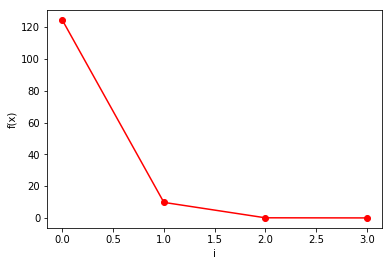

In [33]:
from pylab import plot, xlabel, ylabel
%matplotlib inline     
#上行具体作用：当调用matplotlib.pyplot的绘图函数plot()进行绘图的时候，或者生成一个figure画布的时候，可以直接在python console里面生成图像。
plot(X,Y,'r-o')
xlabel("i")
ylabel("f(x)")

牛顿法和梯度下降法的区别？
梯度下降法是固定步长逐渐下降，而牛顿法是不断的截取零点，就不存在步长这个问题。
牛顿法就是将二阶导数定义为了步长，是一个更为优秀的方法，自适应的步长。
梯度下降法称为一阶方法，牛顿方法为二阶方法

将开放为题转化为求函数 $$f(x) = x^n - y$$ 的根的问题。
$$L(x)=\frac{1}{2}(x^{n}-y)^2$$
$$f(x)=L'(x)$$
牛顿迭代法其实是自适应步长的梯度下降：$$x_{n+1}=x_{n}-\frac{L'(x_n)}{L''(x_n)}$$

### 1.2.3 （补充）不定点迭代

一般的，为了求解非线性方程$$f(x)=0$$将其转换为等价的形式$$x=φ(x)$$其中$φ(x)$为迭代函数。由于（1）与（2）具有相同的解。

则构造迭代公式有：$$x_{k+1}=φ(x_k), k=0,1,2...$$给定初值$x_0$,并且$φ(x)$是连续函数，则有：$$x^*=\lim_{k \to ∞} x_{k+1}=\lim_{k \to ∞} φ(x_k)=φ(\lim_{k \to ∞} x_k)=φ(x^*)$$可得$x^*$是方程的解，也是$f(x)=0$的解。

上面的方法被称为：不定点迭代法

使用条件：

1. $φ(x)$在$[a,b]$内连续，在$(a,b)$内可导。
2. 对于任意的$x∈[a,b]$,则有$φ(x)∈[a,b]$
3. 在$[a,b]$内，存在一个常数$L(0<L<1)$,使得$|φ'(x)|\le L<1$,局部收敛。

In [6]:
def f(x,n,y):        # 定义 f(x)
    return (x**n-y)
def phi(x,n):         #定义φ(x)
    return (x**n-y)+x
x = 0.5      #给定初值
y = 603.    #选择开根常数
n = 32     #开根次数
xi = phi(x,n)
epsilon = 0.0001    #给出精度
while abs(xi-x) > epsilon:
    xi = x
    x = phi(xi,n)
print(x)

OverflowError: (34, 'Result too large')

以上结果说明了选取函数不收敛，所以要换成求根问题还是需要变成根号，这样又回到了最初的原点，无法解决问题。
说明不定点迭代对收敛函数的要求非常高，不如退而转用二分法与牛顿法。

In [12]:
#优化后
def f(x,n,y):        # 定义 f(x)
    return (x**n-y)
def phi(x,n):         #定义φ(x)
    return -(x**n-y)/20000+x
x = 1.3      #给定初值
y = 603.    #选择开根常数
n = 32     #开根次数
xi = phi(x,n)
i = 0
epsilon = 0.0001    #给出精度
while abs(xi-x) > epsilon:
    xi = x
    x = phi(xi,n)
    i+=1
print(x)
print(i)

1.2214615970601141
10
